In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
#!mkdir paper_plots

In [3]:
photon_LL =  np.loadtxt('LL_folder_recEinc/gamma_2.out')

In [4]:
LL_folder = "LL_folder_recEinc/"

In [5]:
neg_91_5GeV =  np.loadtxt(LL_folder+'neg_91_5GeV.out')
neg_58_5GeV =  np.loadtxt(LL_folder+'neg_58_5GeV.out')
neg_24_5GeV =  np.loadtxt(LL_folder+'neg_24_5GeV.out')
neg_20_5GeV =  np.loadtxt(LL_folder+'neg_20_5GeV.out')
neg_16_5GeV =  np.loadtxt(LL_folder+'neg_16_5GeV.out')
neg_8_5GeV =  np.loadtxt(LL_folder+'neg_8_5GeV.out')
zero_5GeV =  np.loadtxt(LL_folder+'zero_5GeV.out')
pos_8_5GeV =  np.loadtxt(LL_folder+'pos_8_5GeV.out')
pos_16_5GeV =  np.loadtxt(LL_folder+'pos_16_5GeV.out')
pos_20_5GeV =  np.loadtxt(LL_folder+'pos_20_5GeV.out')

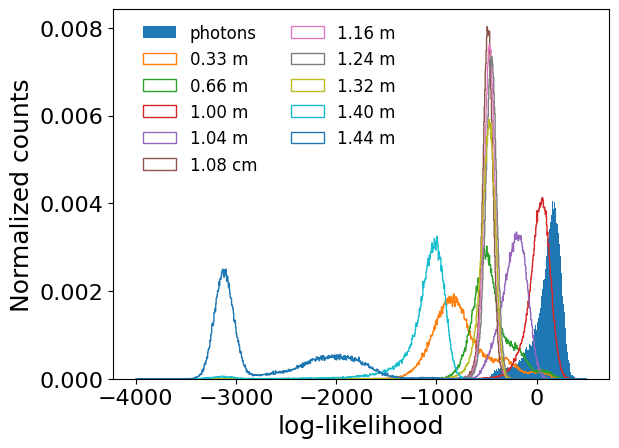

In [6]:
bins = np.linspace(-4000,500,1000)
_ = plt.hist(photon_LL,bins=bins,label="photons",density=True)
_ = plt.hist(neg_91_5GeV,bins=bins,histtype='step',label="0.33 m",density=True)
_ = plt.hist(neg_58_5GeV,bins=bins,histtype='step',label="0.66 m",density=True)
_ = plt.hist(neg_24_5GeV,bins=bins,histtype='step',label="1.00 m",density=True)
_ = plt.hist(neg_20_5GeV,bins=bins,histtype='step',label="1.04 m",density=True)
_ = plt.hist(neg_16_5GeV,bins=bins,histtype='step',label="1.08 cm",density=True)
_ = plt.hist(neg_8_5GeV,bins=bins,histtype='step',label="1.16 m",density=True)
_ = plt.hist(zero_5GeV,bins=bins,histtype='step',label="1.24 m",density=True)
_ = plt.hist(pos_8_5GeV,bins=bins,histtype='step',label="1.32 m",density=True)
_ = plt.hist(pos_16_5GeV,bins=bins,histtype='step',label="1.40 m",density=True)
_ = plt.hist(pos_20_5GeV,bins=bins,histtype='step',label="1.44 m",density=True)

plt.legend(loc='upper right', bbox_to_anchor=(0.6, 1),
          ncol=2, frameon=False, fontsize=12)
#plt.title('5 GeV particle', fontsize=20)
plt.xlabel('log-likelihood',fontsize=18)
plt.ylabel('Normalized counts',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("paper_plots/CF_AD.png",dpi=300, bbox_inches='tight')

In [7]:
roc = {}
for i in range(10):
    roc[i] = []
n = 0
for data in [neg_91_5GeV,neg_58_5GeV,neg_24_5GeV,neg_20_5GeV,neg_16_5GeV,neg_8_5GeV,zero_5GeV,pos_8_5GeV,pos_16_5GeV,pos_20_5GeV]:
    for cut in np.linspace(-4000,500,1000):
        passcut_sig =len(data[data<cut])
        passcut_bg =len(photon_LL[photon_LL<cut])
        roc[n].append([passcut_sig/100000, passcut_bg/100000])
    n += 1

/tmp/ipykernel_349920/3286033539.py:7: RuntimeWarning: divide by zero encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/3286033539.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/3286033539.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr,sig_imp, label=label)
/tmp/ipykernel_349920/3286033539.py:7: RuntimeWarning: divide by zero encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/3286033539.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/3286033539.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr,sig_imp, label=label)
/tmp/ipykernel_349920/3286033539.py:7: RuntimeWarning: divide by zero encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/3286033539.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/

Max significance improvement =  63.941254288604625
AUC =  0.9849596329999999
Max significance improvement =  14.323799519215099
AUC =  0.97277943045
Max significance improvement =  1.2373670070725522
AUC =  0.7136339778000002
Max significance improvement =  2.5885544643023617
AUC =  0.9354423539
Max significance improvement =  13.446449329543634
AUC =  0.9971085192
Max significance improvement =  11.045283856547016
AUC =  0.9960584289000001
Max significance improvement =  8.961638490717293
AUC =  0.9944728810500001
Max significance improvement =  12.150408946916954
AUC =  0.9962478168000001
Max significance improvement =  234.12238884822614
AUC =  0.99998908995
Max significance improvement =  315.8514549752779
AUC =  0.9999999440499999


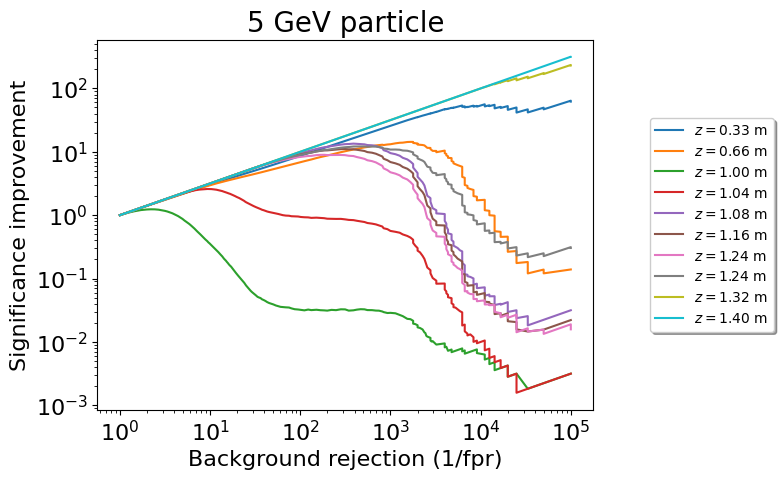

In [8]:
max_sic_list_5GeV = []
label_str = [r"$z = 0.33$ m", r"$z = 0.66$ m", r"$z = 1.00$ m", r"$z = 1.04$ m", r"$z = 1.08$ m", r"$z = 1.16$ m", r"$z = 1.24$ m",r"$z = 1.24$ m",r"$z = 1.32$ m",r"$z = 1.40$ m",r"$z = 1.44$ m"]
for i in range(10):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    sig_imp = tpr/np.sqrt(fpr)
    max_sic = np.nanmax(sig_imp[sig_imp != np.inf])
    print("Max significance improvement = ", max_sic)
    max_sic_list_5GeV.append(max_sic)
    auc = metrics.auc(fpr, tpr)
    print("AUC = ", auc)
    label = label_str[i]# + ", AUC = "+ str(round(auc,3))
    _ = plt.plot(1/fpr,sig_imp, label=label)
    plt.ylabel('Significance improvement', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fancybox=True, shadow=True)
    plt.title('5 GeV particle', fontsize=20)
    plt.xscale('log')
    plt.yscale('log')
    plt.tick_params(axis='both', which='major', labelsize=16)

In [9]:
neg_91_0_5GeV =  np.loadtxt(LL_folder+'neg_91_0.5GeV.out')
neg_58_0_5GeV =  np.loadtxt(LL_folder+'neg_58_0.5GeV.out')
neg_24_0_5GeV =  np.loadtxt(LL_folder+'neg_24_0.5GeV.out')
neg_20_0_5GeV =  np.loadtxt(LL_folder+'neg_20_0.5GeV.out')
neg_16_0_5GeV =  np.loadtxt(LL_folder+'neg_16_0.5GeV.out')
neg_8_0_5GeV =  np.loadtxt(LL_folder+'neg_8_0.5GeV.out')
zero_0_5GeV =  np.loadtxt(LL_folder+'zero_0.5GeV.out')
pos_8_0_5GeV =  np.loadtxt(LL_folder+'pos_8_0.5GeV.out')
pos_16_0_5GeV =  np.loadtxt(LL_folder+'pos_16_0.5GeV.out')
pos_20_0_5GeV =  np.loadtxt(LL_folder+'pos_20_0.5GeV.out')

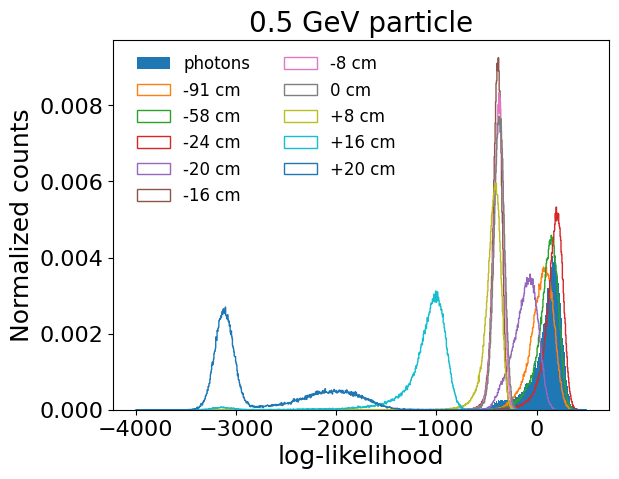

In [10]:
bins = np.linspace(-4000,500,1000)
_ = plt.hist(photon_LL,bins=bins,label="photons",density=True)
_ = plt.hist(neg_91_0_5GeV,bins=bins,histtype='step',label="-91 cm",density=True)
_ = plt.hist(neg_58_0_5GeV,bins=bins,histtype='step',label="-58 cm",density=True)
_ = plt.hist(neg_24_0_5GeV,bins=bins,histtype='step',label="-24 cm",density=True)
_ = plt.hist(neg_20_0_5GeV,bins=bins,histtype='step',label="-20 cm",density=True)
_ = plt.hist(neg_16_0_5GeV,bins=bins,histtype='step',label="-16 cm",density=True)
_ = plt.hist(neg_8_0_5GeV,bins=bins,histtype='step',label="-8 cm",density=True)
_ = plt.hist(zero_0_5GeV,bins=bins,histtype='step',label="0 cm",density=True)
_ = plt.hist(pos_8_0_5GeV,bins=bins,histtype='step',label="+8 cm",density=True)
_ = plt.hist(pos_16_0_5GeV,bins=bins,histtype='step',label="+16 cm",density=True)
_ = plt.hist(pos_20_0_5GeV,bins=bins,histtype='step',label="+20 cm",density=True)

# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5),
#           ncol=3, fancybox=True, shadow=True)
plt.legend(loc='upper right', bbox_to_anchor=(0.6, 1),
          ncol=2, frameon=False, fontsize=12)
plt.title('0.5 GeV particle', fontsize=20)
plt.xlabel('log-likelihood',fontsize=18)
plt.ylabel('Normalized counts',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

In [11]:
roc = {}
for i in range(10):
    roc[i] = []
n = 0
for data in [neg_91_0_5GeV,neg_58_0_5GeV,neg_24_0_5GeV,neg_20_0_5GeV,neg_16_0_5GeV,neg_8_0_5GeV,zero_0_5GeV,pos_8_0_5GeV,pos_16_0_5GeV,pos_20_0_5GeV]:
    for cut in np.linspace(-4000,500,1000):
        passcut_sig =len(data[data<cut])
        passcut_bg =len(photon_LL[photon_LL<cut])
        roc[n].append([passcut_sig/100000, passcut_bg/100000])
    n += 1

/tmp/ipykernel_349920/4117003589.py:7: RuntimeWarning: divide by zero encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/4117003589.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/4117003589.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr,sig_imp, label=label)
/tmp/ipykernel_349920/4117003589.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/4117003589.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr,sig_imp, label=label)
/tmp/ipykernel_349920/4117003589.py:7: RuntimeWarning: divide by zero encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/4117003589.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/4117003589.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr,sig_imp, lab

Max significance improvement =  1.0922062626299485
AUC =  0.6522784518000001
Max significance improvement =  1.0030873530907312
AUC =  0.5191696381
Max significance improvement =  1.0000100001500025
AUC =  0.3574389084
Max significance improvement =  1.8929535926600942
AUC =  0.8762554513999999
Max significance improvement =  5.6434816107671075
AUC =  0.9862615905000001
Max significance improvement =  5.22874070644188
AUC =  0.98374949535
Max significance improvement =  4.99904243665465
AUC =  0.9823520465
Max significance improvement =  6.395668690083237
AUC =  0.99080930635
Max significance improvement =  225.77713810304178
AUC =  0.9999873816
Max significance improvement =  316.2024677955566
AUC =  0.99999999725


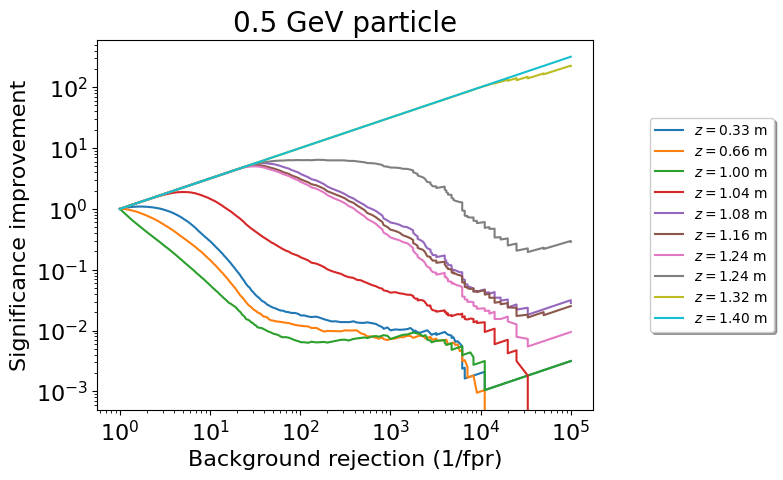

In [12]:
max_sic_list_0_5GeV = []
label_str = [r"$z = 0.33$ m", r"$z = 0.66$ m", r"$z = 1.00$ m", r"$z = 1.04$ m", r"$z = 1.08$ m", r"$z = 1.16$ m", r"$z = 1.24$ m",r"$z = 1.24$ m",r"$z = 1.32$ m",r"$z = 1.40$ m",r"$z = 1.44$ m"]
for i in range(10):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    sig_imp = tpr/np.sqrt(fpr)
    max_sic = np.nanmax(sig_imp[sig_imp != np.inf])
    print("Max significance improvement = ", max_sic)
    max_sic_list_0_5GeV.append(max_sic)
    auc = metrics.auc(fpr, tpr)
    print("AUC = ", auc)
    label = label_str[i]# + ", AUC = "+ str(round(auc,3))
    _ = plt.plot(1/fpr,sig_imp, label=label)
    plt.ylabel('Significance improvement', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fancybox=True, shadow=True)
    plt.title('0.5 GeV particle', fontsize=20)
    plt.xscale('log')
    plt.yscale('log')
    plt.tick_params(axis='both', which='major', labelsize=16)

In [13]:
neg_91_0_05GeV =  np.loadtxt(LL_folder+'neg_91_0.05GeV.out')
neg_58_0_05GeV =  np.loadtxt(LL_folder+'neg_58_0.05GeV.out')
neg_24_0_05GeV =  np.loadtxt(LL_folder+'neg_24_0.05GeV.out')
neg_20_0_05GeV =  np.loadtxt(LL_folder+'neg_20_0.05GeV.out')
neg_16_0_05GeV =  np.loadtxt(LL_folder+'neg_16_0.05GeV.out')
neg_8_0_05GeV =  np.loadtxt(LL_folder+'neg_8_0.05GeV.out')
zero_0_05GeV =  np.loadtxt(LL_folder+'zero_0.05GeV.out')
pos_8_0_05GeV =  np.loadtxt(LL_folder+'pos_8_0.05GeV.out')
pos_16_0_05GeV =  np.loadtxt(LL_folder+'pos_16_0.05GeV.out')
pos_20_0_05GeV =  np.loadtxt(LL_folder+'pos_20_0.05GeV.out')

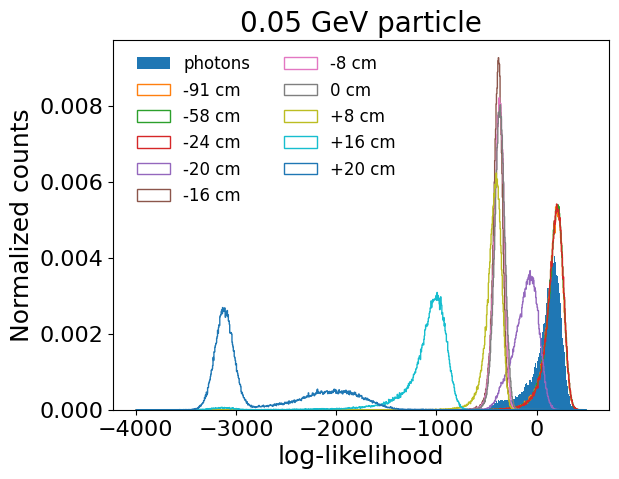

In [14]:
bins = np.linspace(-4000,500,1000)
_ = plt.hist(photon_LL,bins=bins,label="photons",density=True)
_ = plt.hist(neg_91_0_05GeV,bins=bins,histtype='step',label="-91 cm",density=True)
_ = plt.hist(neg_58_0_05GeV,bins=bins,histtype='step',label="-58 cm",density=True)
_ = plt.hist(neg_24_0_05GeV,bins=bins,histtype='step',label="-24 cm",density=True)
_ = plt.hist(neg_20_0_05GeV,bins=bins,histtype='step',label="-20 cm",density=True)
_ = plt.hist(neg_16_0_05GeV,bins=bins,histtype='step',label="-16 cm",density=True)
_ = plt.hist(neg_8_0_05GeV,bins=bins,histtype='step',label="-8 cm",density=True)
_ = plt.hist(zero_0_05GeV,bins=bins,histtype='step',label="0 cm",density=True)
_ = plt.hist(pos_8_0_05GeV,bins=bins,histtype='step',label="+8 cm",density=True)
_ = plt.hist(pos_16_0_05GeV,bins=bins,histtype='step',label="+16 cm",density=True)
_ = plt.hist(pos_20_0_05GeV,bins=bins,histtype='step',label="+20 cm",density=True)

# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5),
#           ncol=3, fancybox=True, shadow=True)
plt.legend(loc='upper right', bbox_to_anchor=(0.6, 1),
          ncol=2, frameon=False, fontsize=12)
plt.title('0.05 GeV particle', fontsize=20)
plt.xlabel('log-likelihood',fontsize=18)
plt.ylabel('Normalized counts',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

In [15]:
for i in range(10):
    roc[i] = []
n = 0
for data in [neg_91_0_05GeV,neg_58_0_05GeV,neg_24_0_05GeV,neg_20_0_05GeV,neg_16_0_05GeV,neg_8_0_05GeV,zero_0_05GeV,pos_8_0_05GeV,pos_16_0_05GeV,pos_20_0_05GeV]:
    for cut in np.linspace(-4000,500,1000):
        passcut_sig =len(data[data<cut])
        passcut_bg =len(photon_LL[photon_LL<cut])
        roc[n].append([passcut_sig/100000, passcut_bg/100000])
    n += 1

/tmp/ipykernel_349920/2841268093.py:7: RuntimeWarning: divide by zero encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/2841268093.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/2841268093.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr,sig_imp, label=label)
/tmp/ipykernel_349920/2841268093.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/2841268093.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr,sig_imp, label=label)
/tmp/ipykernel_349920/2841268093.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/2841268093.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr,sig_imp, label=label)
/tmp/ipykernel_349920/2841268093.py:7: RuntimeWarning: divide by zero encountered in divide
  sig_imp = tpr/np.

Max significance improvement =  1.0000100001500025
AUC =  0.35022494695000006
Max significance improvement =  1.0000050000375003
AUC =  0.34345506555
Max significance improvement =  1.0000100001500025
AUC =  0.34115879165
Max significance improvement =  1.864619075332318
AUC =  0.8717856576999998
Max significance improvement =  5.507697452949328
AUC =  0.98527640055
Max significance improvement =  5.12231457124526
AUC =  0.98279199605
Max significance improvement =  4.918490687315822
AUC =  0.98131951705
Max significance improvement =  5.968687686812127
AUC =  0.9898457866500001
Max significance improvement =  220.30007319563015
AUC =  0.9999864041000001
Max significance improvement =  316.19298096257603
AUC =  0.9999999964499999


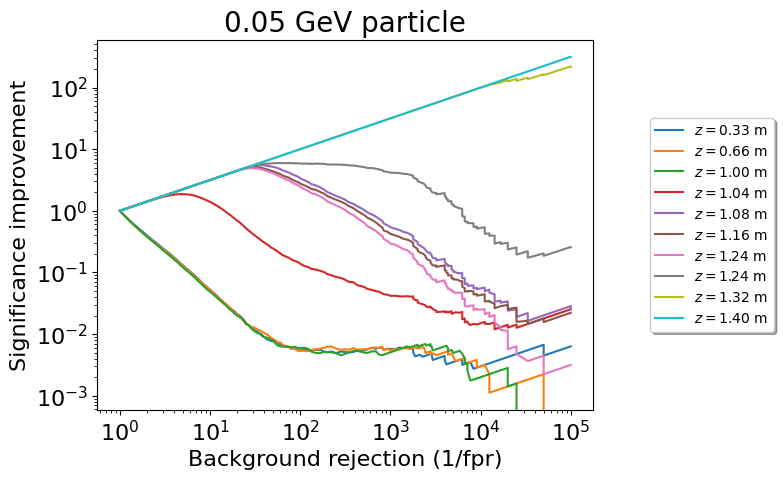

In [16]:
max_sic_list_0_05GeV = []
label_str = [r"$z = 0.33$ m", r"$z = 0.66$ m", r"$z = 1.00$ m", r"$z = 1.04$ m", r"$z = 1.08$ m", r"$z = 1.16$ m", r"$z = 1.24$ m",r"$z = 1.24$ m",r"$z = 1.32$ m",r"$z = 1.40$ m",r"$z = 1.44$ m"]
for i in range(10):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    sig_imp = tpr/np.sqrt(fpr)
    max_sic = np.nanmax(sig_imp[sig_imp != np.inf])
    print("Max significance improvement = ", max_sic)
    max_sic_list_0_05GeV.append(max_sic)
    auc = metrics.auc(fpr, tpr)
    print("AUC = ", auc)
    label = label_str[i]# + ", AUC = "+ str(round(auc,3))
    _ = plt.plot(1/fpr,sig_imp, label=label)
    plt.ylabel('Significance improvement', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fancybox=True, shadow=True)
    plt.title('0.05 GeV particle', fontsize=20)
    plt.xscale('log')
    plt.yscale('log')
    plt.tick_params(axis='both', which='major', labelsize=16)

In [17]:
neg_91_low =  np.loadtxt(LL_folder+'neg_91_low.out')
neg_58_low =  np.loadtxt(LL_folder+'neg_58_low.out')
neg_24_low =  np.loadtxt(LL_folder+'neg_24_low.out')
neg_20_low =  np.loadtxt(LL_folder+'neg_20_low.out')
neg_16_low =  np.loadtxt(LL_folder+'neg_16_low.out')
neg_8_low =  np.loadtxt(LL_folder+'neg_8_low.out')
zero_low =  np.loadtxt(LL_folder+'zero_low.out')
pos_8_low =  np.loadtxt(LL_folder+'pos_8_low.out')
pos_16_low =  np.loadtxt(LL_folder+'pos_16_low.out')
pos_20_low =  np.loadtxt(LL_folder+'pos_20_low.out')

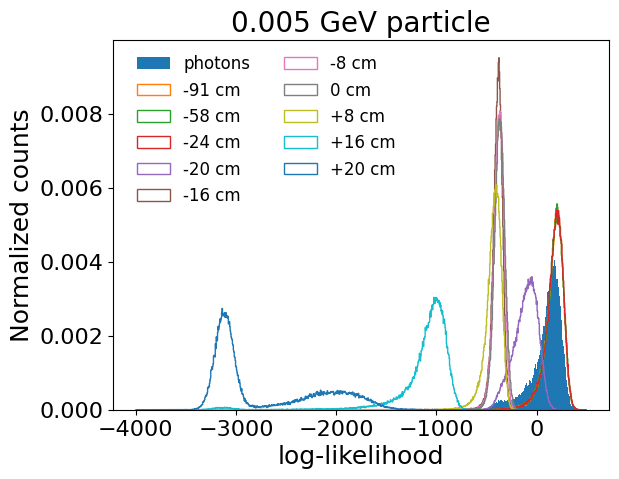

In [18]:
bins = np.linspace(-4000,500,1000)
_ = plt.hist(photon_LL,bins=bins,label="photons",density=True)
_ = plt.hist(neg_91_low,bins=bins,histtype='step',label="-91 cm",density=True)
_ = plt.hist(neg_58_low,bins=bins,histtype='step',label="-58 cm",density=True)
_ = plt.hist(neg_24_low,bins=bins,histtype='step',label="-24 cm",density=True)
_ = plt.hist(neg_20_low,bins=bins,histtype='step',label="-20 cm",density=True)
_ = plt.hist(neg_16_low,bins=bins,histtype='step',label="-16 cm",density=True)
_ = plt.hist(neg_8_low,bins=bins,histtype='step',label="-8 cm",density=True)
_ = plt.hist(zero_low,bins=bins,histtype='step',label="0 cm",density=True)
_ = plt.hist(pos_8_low,bins=bins,histtype='step',label="+8 cm",density=True)
_ = plt.hist(pos_16_low,bins=bins,histtype='step',label="+16 cm",density=True)
_ = plt.hist(pos_20_low,bins=bins,histtype='step',label="+20 cm",density=True)

# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5),
#           ncol=3, fancybox=True, shadow=True)
plt.legend(loc='upper right', bbox_to_anchor=(0.6, 1),
          ncol=2, frameon=False, fontsize=12)
plt.title('0.005 GeV particle', fontsize=20)
plt.xlabel('log-likelihood',fontsize=18)
plt.ylabel('Normalized counts',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

In [19]:
for i in range(10):
    roc[i] = []
n = 0
for data in [neg_91_low,neg_58_low,neg_24_low,neg_20_low,neg_16_low,neg_8_low,zero_low,pos_8_low,pos_16_low,pos_20_low]:
    for cut in np.linspace(-4000,500,1000):
        passcut_sig =len(data[data<cut])
        passcut_bg =len(photon_LL[photon_LL<cut])
        roc[n].append([passcut_sig/100000, passcut_bg/100000])
    n += 1

/tmp/ipykernel_349920/3943882829.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/3943882829.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr,sig_imp, label=label)
/tmp/ipykernel_349920/3943882829.py:7: RuntimeWarning: divide by zero encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/3943882829.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/3943882829.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr,sig_imp, label=label)
/tmp/ipykernel_349920/3943882829.py:7: RuntimeWarning: divide by zero encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/3943882829.py:7: RuntimeWarning: invalid value encountered in divide
  sig_imp = tpr/np.sqrt(fpr)
/tmp/ipykernel_349920/3943882829.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr,sig_imp, lab

Max significance improvement =  1.0000050000375003
AUC =  0.3406125062
Max significance improvement =  1.0000000000500011
AUC =  0.34111564534999994
Max significance improvement =  1.0000100001500025
AUC =  0.33999021264999996
Max significance improvement =  1.864355856669102
AUC =  0.8717355495
Max significance improvement =  5.504083912942363
AUC =  0.98520578155
Max significance improvement =  5.120750301024567
AUC =  0.98281964415
Max significance improvement =  4.918760622593102
AUC =  0.9813643476
Max significance improvement =  5.9849771111526415
AUC =  0.9898849213
Max significance improvement =  219.5822361667719
AUC =  0.9999863652000001
Max significance improvement =  316.20563007321675
AUC =  0.99999999715


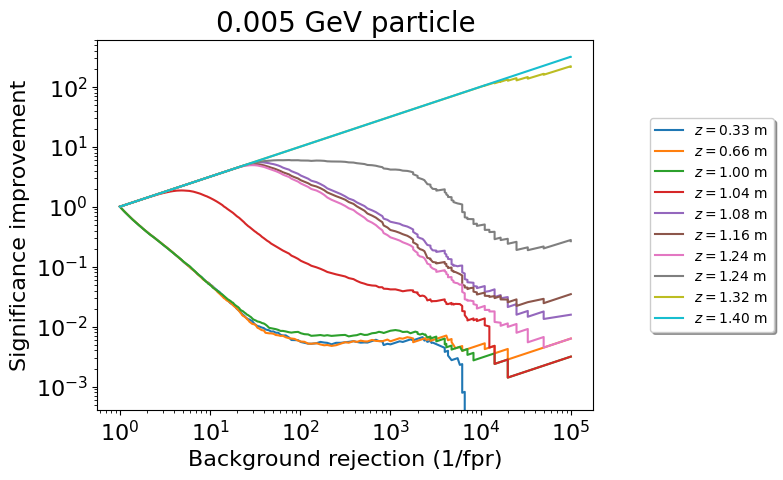

In [20]:
max_sic_list_0_005GeV = []
label_str = [r"$z = 0.33$ m", r"$z = 0.66$ m", r"$z = 1.00$ m", r"$z = 1.04$ m", r"$z = 1.08$ m", r"$z = 1.16$ m", r"$z = 1.24$ m",r"$z = 1.24$ m",r"$z = 1.32$ m",r"$z = 1.40$ m",r"$z = 1.44$ m"]
for i in range(10):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    sig_imp = tpr/np.sqrt(fpr)
    max_sic = np.nanmax(sig_imp[sig_imp != np.inf])
    print("Max significance improvement = ", max_sic)
    max_sic_list_0_005GeV.append(max_sic)
    auc = metrics.auc(fpr, tpr)
    print("AUC = ", auc)
    label = label_str[i]# + ", AUC = "+ str(round(auc,3))
    _ = plt.plot(1/fpr,sig_imp, label=label)
    plt.ylabel('Significance improvement', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fancybox=True, shadow=True)
    plt.title('0.005 GeV particle', fontsize=20)
    plt.xscale('log')
    plt.yscale('log')
    plt.tick_params(axis='both', which='major', labelsize=16)

In [21]:
max_sic_list_5GeV 

[63.941254288604625,
 14.323799519215099,
 1.2373670070725522,
 2.5885544643023617,
 13.446449329543634,
 11.045283856547016,
 8.961638490717293,
 12.150408946916954,
 234.12238884822614,
 315.8514549752779]

In [22]:
max_sic_list_0_5GeV 

[1.0922062626299485,
 1.0030873530907312,
 1.0000100001500025,
 1.8929535926600942,
 5.6434816107671075,
 5.22874070644188,
 4.99904243665465,
 6.395668690083237,
 225.77713810304178,
 316.2024677955566]

In [23]:
max_sic_list_0_05GeV 

[1.0000100001500025,
 1.0000050000375003,
 1.0000100001500025,
 1.864619075332318,
 5.507697452949328,
 5.12231457124526,
 4.918490687315822,
 5.968687686812127,
 220.30007319563015,
 316.19298096257603]

In [24]:
max_sic_list_0_005GeV 

[1.0000050000375003,
 1.0000000000500011,
 1.0000100001500025,
 1.864355856669102,
 5.504083912942363,
 5.120750301024567,
 4.918760622593102,
 5.9849771111526415,
 219.5822361667719,
 316.20563007321675]

In [25]:
max_sic_list_5GeV = np.array(max_sic_list_5GeV ).reshape(-1,1)
max_sic_list_0_5GeV = np.array(max_sic_list_0_5GeV ).reshape(-1,1)
max_sic_list_0_05GeV = np.array(max_sic_list_0_05GeV ).reshape(-1,1)
max_sic_list_0_005GeV = np.array(max_sic_list_0_005GeV ).reshape(-1,1)

max_sic_full = np.concatenate([max_sic_list_0_005GeV,max_sic_list_0_05GeV,max_sic_list_0_5GeV,max_sic_list_5GeV],axis=1)

In [26]:
#!pip install seaborn

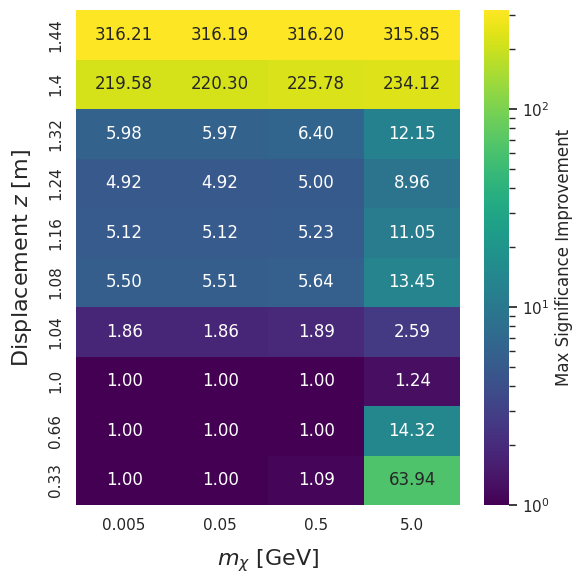

In [27]:
import seaborn as sns; sns.set_theme(style='white')
import pandas as pd
from matplotlib.colors import LogNorm, Normalize
y_axis_labels = [0.33,0.66,1.00,1.04,1.08,1.16,1.24,1.32,1.40,1.44] # labels for x-axis
x_axis_labels = [0.005, 0.05, 0.5, 5] # labels for y-axis
df_cm = pd.DataFrame(max_sic_full, index = [i for i in y_axis_labels],
                  columns = [i for i in x_axis_labels])
fig = plt.figure(figsize=(6,6))
ax = sns.heatmap(df_cm, square=False, norm=LogNorm(), cmap="viridis",annot=True, fmt='.2f',cbar_kws={'label': 'Max Significance Improvement'})
#ax.set_box_aspect(1)
ax.invert_yaxis()
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=16,labelpad=10)
plt.ylabel(r"Displacement $z$ [m]",fontsize=16,labelpad=10)
plt.tight_layout()
#plt.show()
plt.savefig("paper_plots/fixed_disp_heatmap.png",dpi=300, bbox_inches='tight')